This notebook gets domain indices for a chosen sub region using the gridT files in `production/OUTPUTS/`.

We confirm the size of the domain for 1/4 deg using the mask file is adequate i.e. more than 40 by 40 grid points.

The sub-region is computed using the t-grid.

A plot is made of SSH using the gridT data in `production/OUTPUTS/`.

In [17]:
import xarray as xr
import numpy as np
import cmocean

Load in data files

In [2]:
mask025_path = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP4/mesh_mask_025.nc'
mask025 = xr.open_dataset(mask025_path)

data_t_path = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/production/OUTPUTS/'
ds = xr.open_dataset(data_t_path + 'MINT_1d_00610101_00610130_grid_T.nc')

A quick plot of ssh

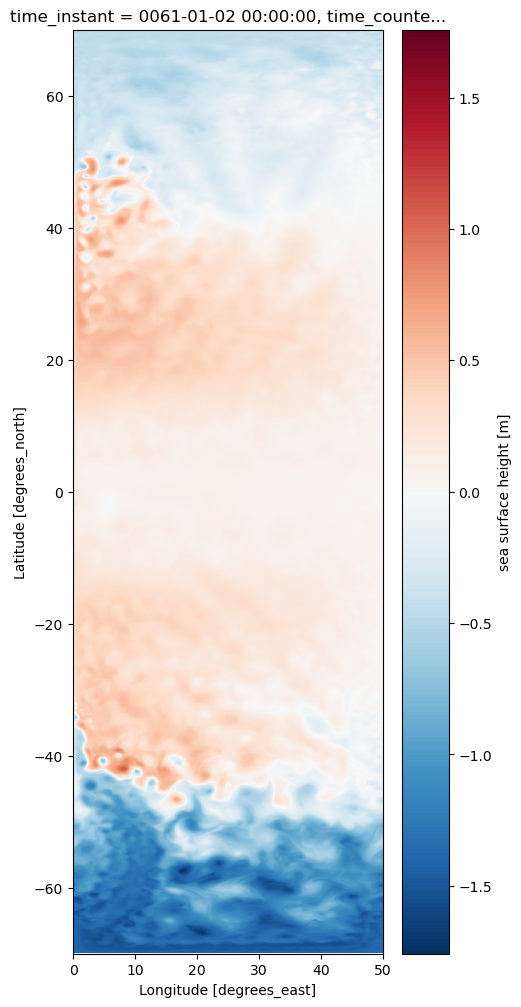

In [7]:
ds.isel(time_counter=0).zos.plot(figsize=(5,12), x='nav_lon', y='nav_lat')

Begin subsampling dataset

In [25]:
ds_masked = ds.zos.where( (-50 < ds.nav_lat) &
            (ds.nav_lat < -40) &
            (32.5 < ds.nav_lon) &
            (ds.nav_lon < 47.5)
            )

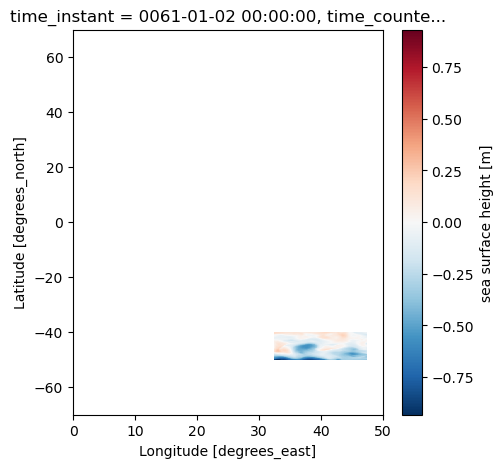

In [40]:
ds_masked.isel(time_counter=0).plot(figsize=(5,5), x='nav_lon', y='nav_lat')

In [27]:
ds_subsample = ds_masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

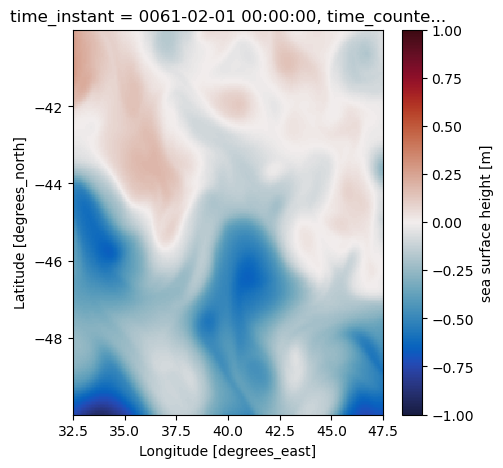

In [29]:
ds_subsample.isel(time_counter=29).plot(figsize=(5,5), 
                                       x='nav_lon', y='nav_lat', 
                                       vmin=-1, vmax=1,
                                       cmap=cmocean.cm.balance)

How do these lat and lon look in mask025?

In [30]:
mask025_masked = mask025.gphit.where( (-50 < mask025.nav_lat) &
            (mask025.nav_lat < -40) &
            (32.5 < mask025.nav_lon) &
            (mask025.nav_lon < 47.5)
            )

In [31]:
mask025_subsample = mask025_masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

In [32]:
mask025_subsample

<xarray.DataArray 'gphit' (time_counter: 1, y: 57, x: 60)> Size: 27kB
array([[[-49.89840883, -49.89840883, -49.89840883, ..., -49.89840883,
         -49.89840883, -49.89840883],
        [-49.73710379, -49.73710379, -49.73710379, ..., -49.73710379,
         -49.73710379, -49.73710379],
        [-49.57526078, -49.57526078, -49.57526078, ..., -49.57526078,
         -49.57526078, -49.57526078],
        ...,
        [-40.41126539, -40.41126539, -40.41126539, ..., -40.41126539,
         -40.41126539, -40.41126539],
        [-40.22064356, -40.22064356, -40.22064356, ..., -40.22064356,
         -40.22064356, -40.22064356],
        [-40.02948388, -40.02948388, -40.02948388, ..., -40.02948388,
         -40.02948388, -40.02948388]]], shape=(1, 57, 60))
Coordinates:
  * time_counter  (time_counter) float32 4B 0.0
Dimensions without coordinates: y, x

Get the indices from ds_masked

In [35]:
condition = ~np.isnan(ds_masked.isel(time_counter=0))

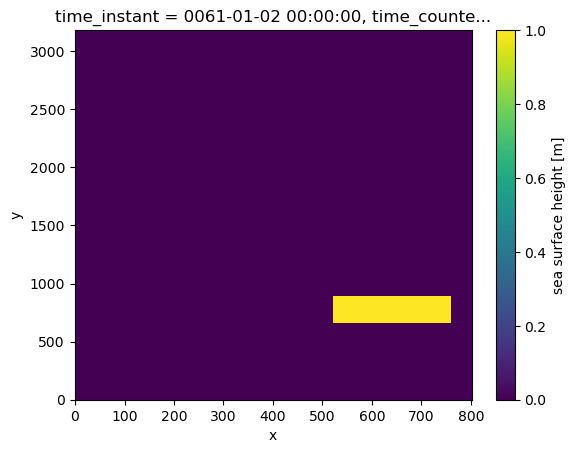

In [37]:
condition.plot()

In [38]:
subsample = np.argwhere(condition.values)

In [39]:
jmin, imin = subsample[:,0].min(), subsample[:,1].min()
jmax, imax = subsample[:,0].max(), subsample[:,1].max()

jmin, jmax, imin, imax

(np.int64(665), np.int64(891), np.int64(521), np.int64(760))